<a href="https://colab.research.google.com/github/brinsley734/ML-Imaging-/blob/main/IntroIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week1 : Introduction to Image Processing


# Mount Google drive

In [1]:

from google.colab import drive, files
drive.mount('/content/drive') # mount your google colab file

Mounted at /content/drive


In [2]:
# import relevant modules

import skimage
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from skimage import io


# Choose a colour image you would like to process (e.g. download an image from the web)

In [3]:
uploaded = files.upload() # upload a file. E.g. an image file

Saving R.jpg to R.jpg


In [4]:
print(list(uploaded.keys())[0])

R.jpg


# Read the image into the memory and plot it

<class 'numpy.ndarray'>
uint8
(1600, 2560, 3)
0 255


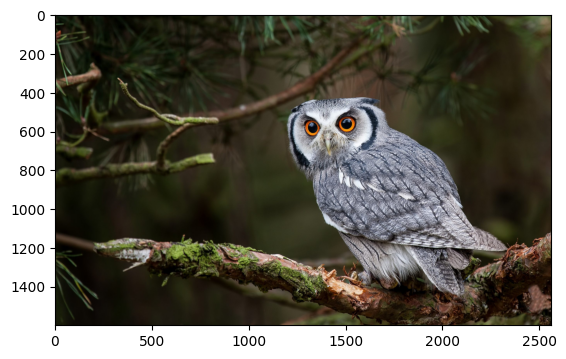

In [6]:
img = io.imread(list(uploaded.keys())[0]) # - read in your uploaded image
#img = io.imread('/content/drive/MyDrive/ML_IPData1/Cat/000001.jpg')


print(type(img))
print(img.dtype)
print(img.shape)
print(img.min(), img.max())
plt.imshow(img)

# What is plotted below?

Text(0.5, 0, 'B')

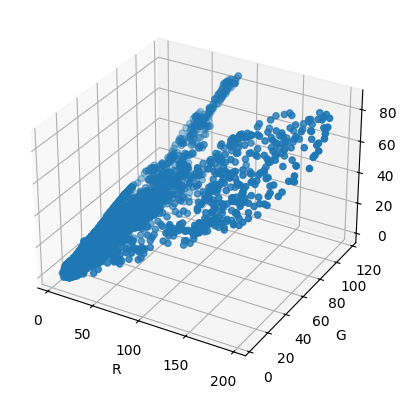

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(img[0:100,0:100,0].reshape(-1), img[0:100,0:100,1].reshape(-1), img[0:100,0:100,2].reshape(-1), marker = 'o')


#label axes
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

# Plot the histogram of the red channel. (Think of it as a marginal distribution)

Display histograms of all the channels.

/tmp/ipython-input-3674262061.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img[:,:,0].reshape(-1),256,[0,256]),plt.show();


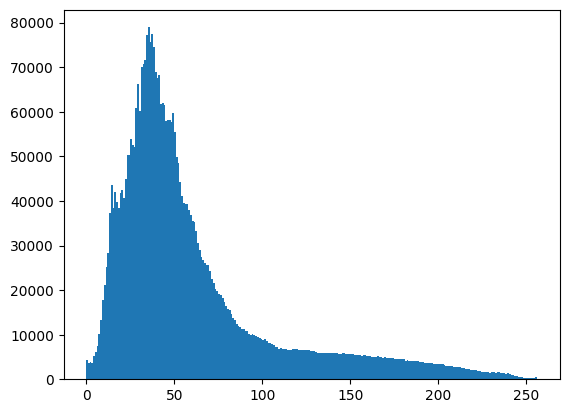

In [8]:
plt.hist(img[:,:,0].reshape(-1),256,[0,256]),plt.show();

Plot the histograms of the blue and green channels.

In [9]:

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, s = 1)

    # now determine nice limits by hand:
    binwidth = 10
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(0, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

Text(0, 0.5, 'Green')

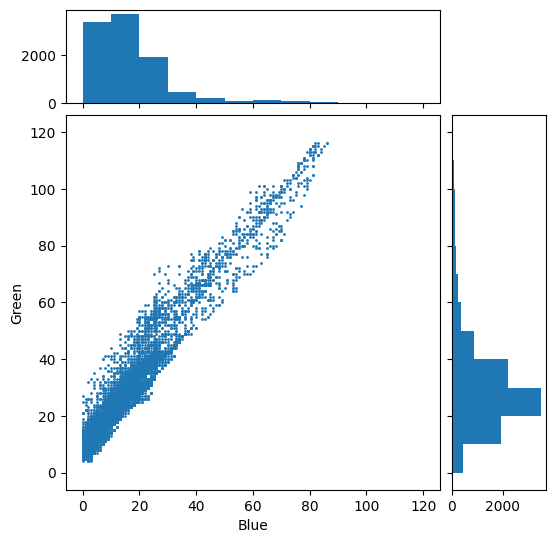

In [10]:
fig = plt.figure(figsize=(6, 6))
x = img[0:100,0:100,2].reshape(-1)
y = img[0:100,0:100,1].reshape(-1)
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal Axes and the main Axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)
ax.set_xlabel('Blue')
ax.set_ylabel('Green')

# Image Rotations

Notice the difference between the rotated two images below

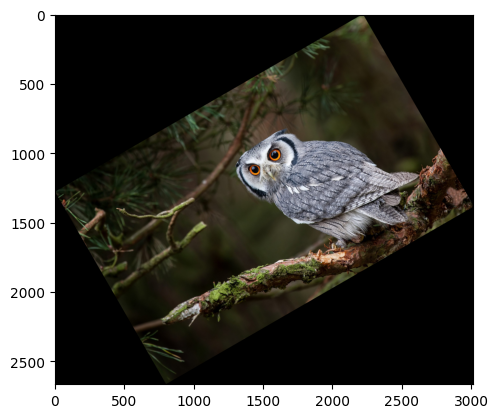

In [11]:
from skimage.transform import rotate
R1 = rotate(img, 30, resize=True)
plt.imshow(R1)


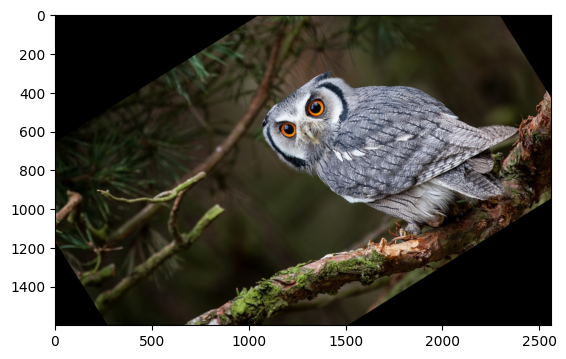

In [12]:
R2 = rotate(img, 32)
plt.imshow(R2)

# Thresholding

Classify pixels in foreground and background based on pixel intensity.
If the pixel larger than a certain value - it is classified as foreground.
Try to find a reasonable value for the threshold (thresh).

Otsu thresholding allows for automated selection of a "good threshold" (foreground pixels are similar to each other, and dissimilar to background pixels).

In [13]:
import skimage.filters
img_gray = skimage.color.rgb2gray(img)
img_gray.max()

np.float64(1.0)

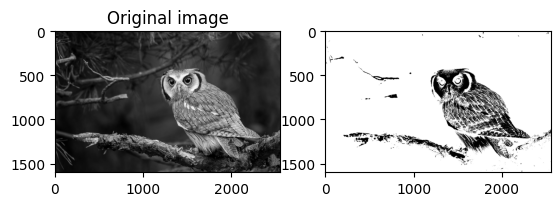

In [14]:
 # Modify the value of thresh below
 thresh = 0.5
# Try Otsu thresholding. Uncomment the line below.
# thresh = skimage.filters.threshold_otsu(img_gray)
binary = img_gray <= thresh


binary
fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(binary, cmap='gray')

In [15]:
import matplotlib.pyplot as plt

from skimage.transform import rescale, resize, downscale_local_mean


pixelated = img_gray[::8, ::8]

image_rescaled = rescale(img_gray, 0.125)




Text(0.5, 1.0, 'Pixelated')

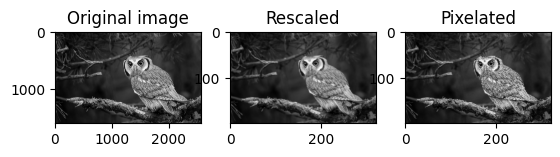

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3)

ax = axes.ravel()

ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled")

ax[2].imshow(pixelated, cmap='gray')
ax[2].set_title("Pixelated")

# Correlation/Convolution

In [20]:
print(np.convolve([1,2,3],[0,1,0.5], 'valid'))
print(np.correlate([1,2,3],[0,1,0.5], 'valid'))

[2.5]
[3.5]


# Filters

More information you can find here:

https://scikit-image.org/skimage-tutorials/lectures/1_image_filters.html

Below you can see the result of an average filter (size 5x5).

Try to implement horizontal and vertical edge filters.

Try unsharp masking. What is the effect of the unsharp masking?

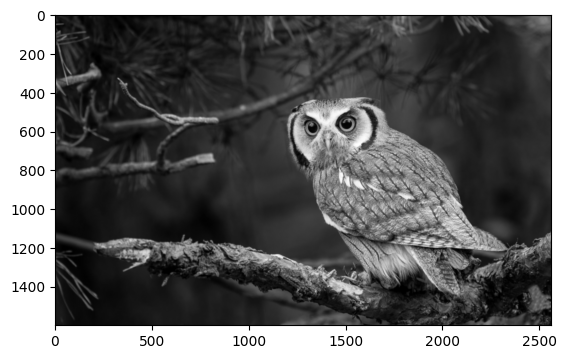

In [21]:
from scipy.ndimage import correlate
kernel = np.ones((5,5),np.float32)/25
#kernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
res_conv = correlate(img_gray, kernel)
plt.imshow(res_conv, cmap="gray")


Test pre-imlemented filters.

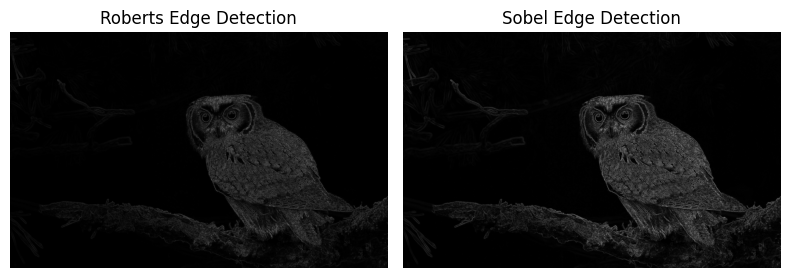

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters
from skimage.data import camera
from skimage.util import compare_images

edge_roberts = filters.roberts(img_gray)
edge_sobel = filters.sobel(img_gray)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

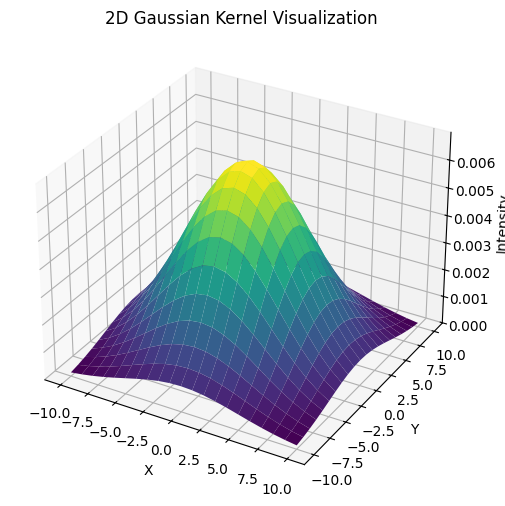

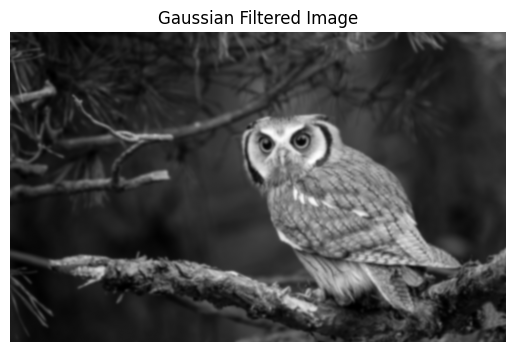

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage.filters import gaussian

# Function to generate a 2D Gaussian kernel
def gaussian_kernel(size, sigma):
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-(x**2 + y**2) / (2.0 * sigma**2))
    return g / g.sum()

# Generate a Gaussian kernel and visualize it
kernel_size = 21
sigma = 5
gaussian_k = gaussian_kernel(kernel_size, sigma)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(-kernel_size//2 + 1, kernel_size//2 + 1)
y = np.arange(-kernel_size//2 + 1, kernel_size//2 + 1)
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, gaussian_k, cmap='viridis')
ax.set_title('2D Gaussian Kernel Visualization')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
plt.show()

# Apply Gaussian filter to the image (re-running the previous code for clarity)
img_gaussian = gaussian(img_gray, sigma=sigma) # Using the same sigma as the kernel visualization

# Display the result
plt.imshow(img_gaussian, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')
plt.show()